<b>About this dataset</b>

- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type

    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results

    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

Steps
- EDA
- Feature Engineering
- Train Test Split
- Scaling


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
heartdf = pd.read_csv("/Users/zainali/Documents/DS-Projects/Heart Attack Analysis/data/heart.csv")

In [3]:
heartdf.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heartdf.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Transform few attributes to categorical
heartdf['sex'] = pd.Categorical(heartdf['sex'])
heartdf['cp'] = pd.Categorical(heartdf['cp'])
heartdf['fbs'] = pd.Categorical(heartdf['fbs'])
heartdf['restecg'] = pd.Categorical(heartdf['restecg'])
heartdf['exng'] = pd.Categorical(heartdf['exng'])
heartdf['slp'] = pd.Categorical(heartdf['slp'])
heartdf['caa'] = pd.Categorical(heartdf['caa'])
heartdf['thall'] = pd.Categorical(heartdf['thall'])

In [6]:
# Check on the data structure
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


In [7]:
# Check for missing values
heartdf.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in heartdf.columns if heartdf[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
if features_with_na:
    for feature in features_with_na:
        print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No Null values in any of the feature")


No Null values in any of the feature


1    165
0    138
Name: output, dtype: int64


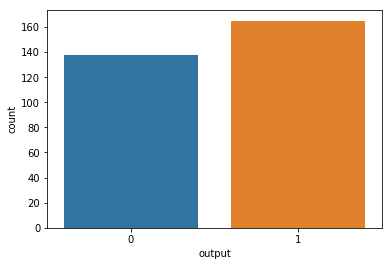

In [9]:
# Explore the response variable
print(heartdf['output'].value_counts())
sns.countplot(x='output', data=heartdf);

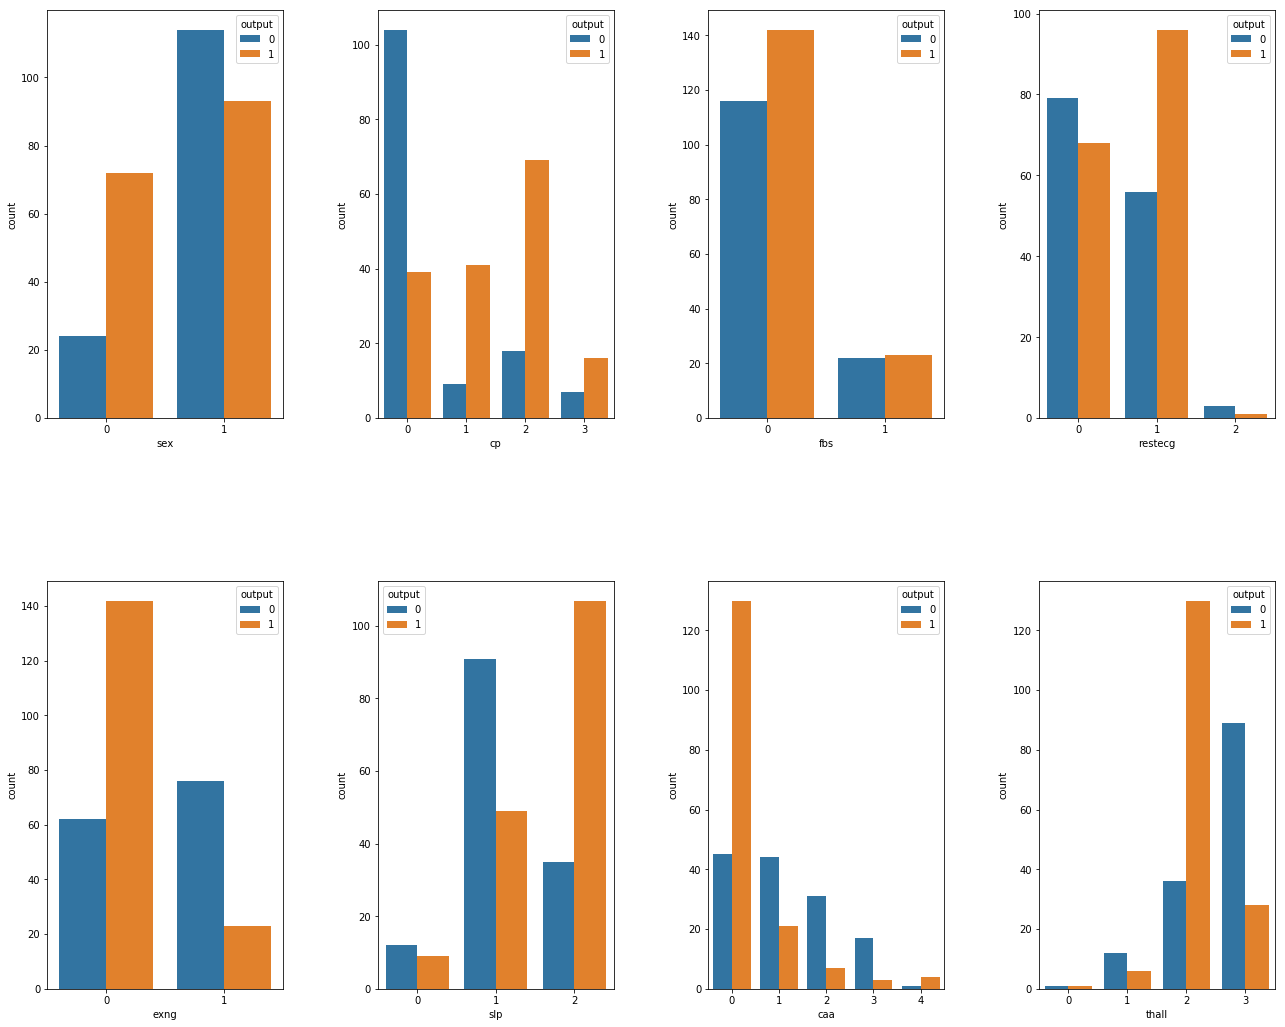

In [10]:
fig = plt.figure(figsize=(22, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 4, 1)
sns.countplot(x='sex', hue='output', data=heartdf, ax=ax)

ax = fig.add_subplot(2, 4, 2)
sns.countplot(x='cp', hue='output', data=heartdf, ax=ax)

ax = fig.add_subplot(2, 4, 3)
sns.countplot(x='fbs', hue='output', data=heartdf, ax=ax)

ax = fig.add_subplot(2, 4, 4)
sns.countplot(x='restecg', hue='output', data=heartdf, ax=ax)

ax = fig.add_subplot(2, 4, 5)
sns.countplot(x='exng', hue='output', data=heartdf, ax=ax)

ax = fig.add_subplot(2, 4, 6)
sns.countplot(x='slp', hue='output', data=heartdf, ax=ax)

ax = fig.add_subplot(2, 4, 7)
sns.countplot(x='caa', hue='output', data=heartdf, ax=ax)

ax = fig.add_subplot(2, 4, 8)
sns.countplot(x='thall', hue='output', data=heartdf, ax=ax)

plt.show()

Average Age by Output

output
0    56.601449
1    52.496970
Name: age, dtype: float64




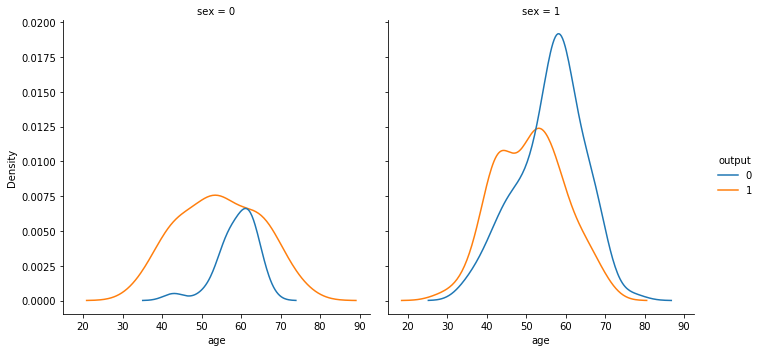

In [11]:
# Explore Age attribute by Sex with respect to Output

sns.displot(data=heartdf, x="age", hue="output", col="sex", kind="kde")

print("Average Age by Output\n")
print(heartdf.groupby("output")['age'].mean())
print("\n")

Average trtbps by Output

output
0    134.398551
1    129.303030
Name: trtbps, dtype: float64




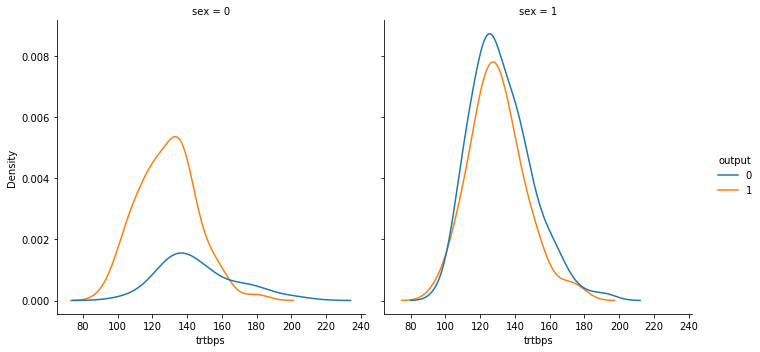

In [13]:
# Explore trtbps attribute by Sex with respect to Output

sns.displot(data=heartdf, x="trtbps", hue="output", col="sex", kind="kde")

print("Average trtbps by Output\n")
print(heartdf.groupby("output")['trtbps'].mean())
print("\n")

Average Cholesterol by Output

output
0    251.086957
1    242.230303
Name: chol, dtype: float64




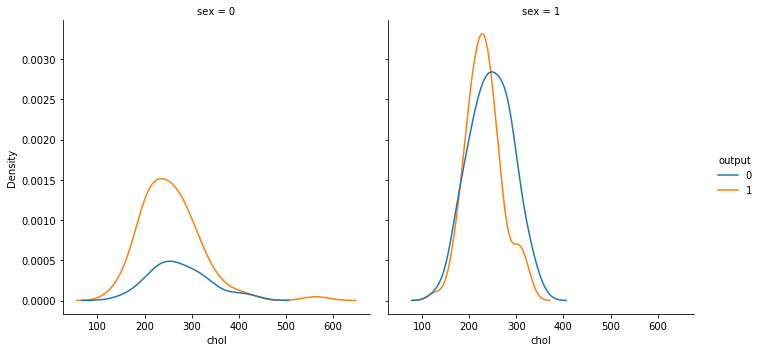

In [15]:
# Explore Chol attribute by Sex with respect to Output

sns.displot(data=heartdf, x="chol", hue="output", col="sex", kind="kde")

print("Average Cholesterol by Output\n")
print(heartdf.groupby("output")['chol'].mean())
print("\n")

Average thalachh by Output

output
0    139.101449
1    158.466667
Name: thalachh, dtype: float64




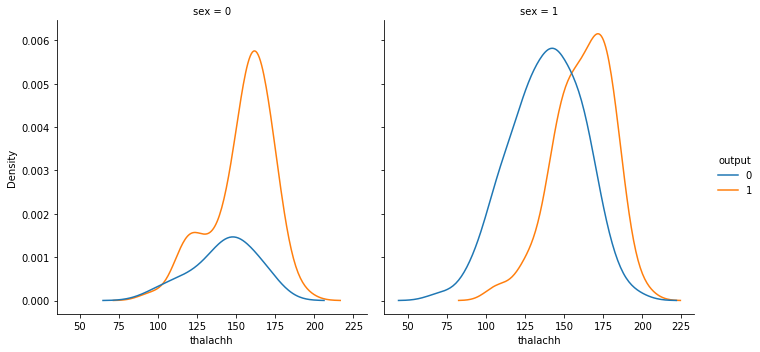

In [16]:
# Explore thalachh attribute by Sex with respect to Output

sns.displot(data=heartdf, x="thalachh", hue="output", col="sex", kind="kde")

print("Average thalachh by Output\n")
print(heartdf.groupby("output")['thalachh'].mean())
print("\n")

Average oldpeak by Output

output
0    1.585507
1    0.583030
Name: oldpeak, dtype: float64




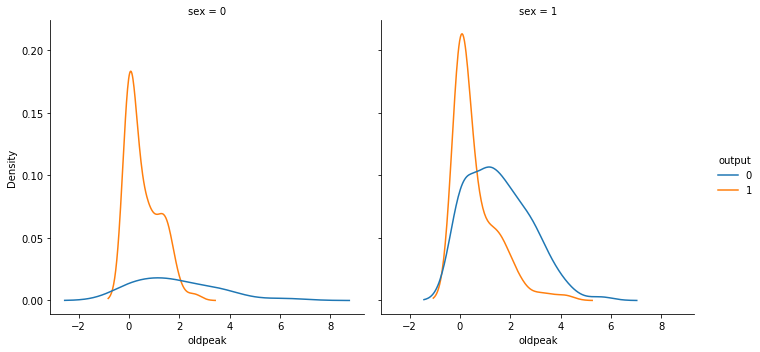

In [17]:
# Explore oldpeak attribute by Sex with respect to Output

sns.displot(data=heartdf, x="oldpeak", hue="output", col="sex", kind="kde")

print("Average oldpeak by Output\n")
print(heartdf.groupby("output")['oldpeak'].mean())
print("\n")

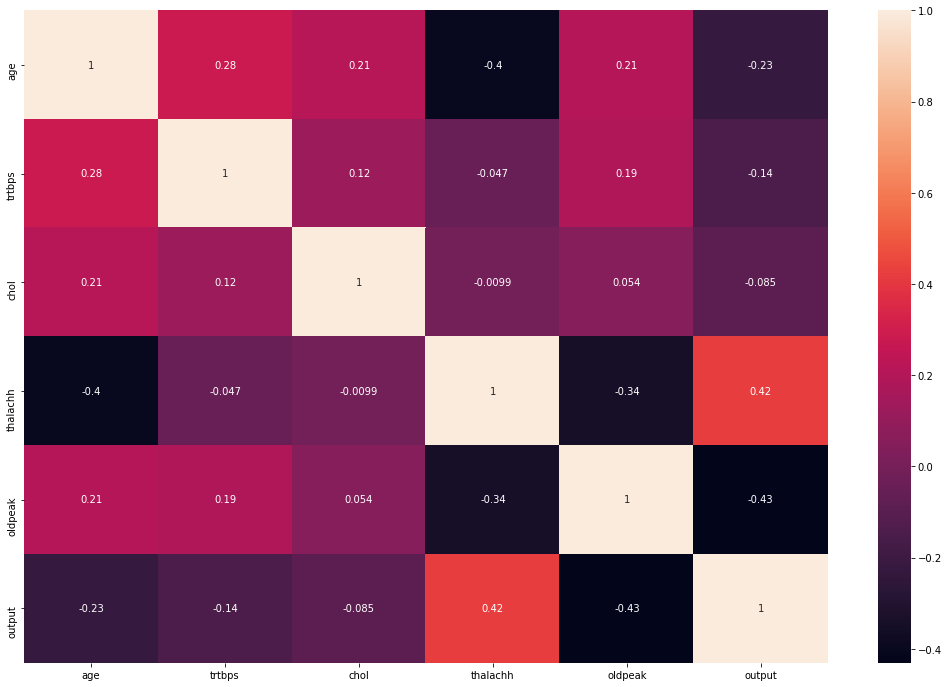

In [18]:
# Lets understand correlations
plt.figure(figsize=(18, 12))
sns.heatmap(heartdf.corr(), annot=True)

In [39]:
heartdf.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
from sklearn.model_selection import train_test_split

features = heartdf.drop(labels=['output'], axis=1)
target = heartdf['output']
print('X shape: {}'.format(np.shape(features)))
print('y shape: {}'.format(np.shape(target)))
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, random_state=101)

X shape: (303, 13)
y shape: (303,)


In [72]:
# Log Reg

lr = LogisticRegression()
model = lr.fit(features_train, target_train)
lr_predict = lr.predict(features_test)
lr_conf_matrix = confusion_matrix(target_test, lr_predict)
lr_acc_score = accuracy_score(target_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(target_test,lr_predict))

confussion matrix
[[35  9]
 [ 2 45]]


Accuracy of Logistic Regression: 87.91208791208791 

             precision    recall  f1-score   support

          0       0.95      0.80      0.86        44
          1       0.83      0.96      0.89        47

avg / total       0.89      0.88      0.88        91



In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
features_train_scaled = sc.fit_transform(features_train)
features_test_scaled = sc.transform(features_test)

Running DT
Notes:

- Decision Trees are a supervised learning method used for classification and regression

How it works:
- The ID3 algorithm begins with the original set {S} S as the root node
- On each iteration of the algorithm, it iterates through every unused attribute of the set and calculates the entropy (or information gain) of that attribute
- It then selects the attribute which has the smallest entropy (or largest information gain) value. 
- The set is then split by the selected attribute to produce subsets of the data. 
- The algorithm continues to recurse on each subset, considering only attributes never selected before.

How Decision Tree works best explenation: https://www.youtube.com/watch?v=_XhOdSLlE5c&ab_channel=VictorLavrenko

What is information gain / entropy: https://www.youtube.com/watch?v=nodQ2s0CUbI&ab_channel=VictorLavrenko

Scikit Documentation: https://scikit-learn.org/stable/modules/tree.html

In [43]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(features_train, target_train)

# Doc:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [49]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
#del final_fi

# Calculating FI
for i, column in enumerate(heartdf.drop('output', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature age:, 0.165
Importance of feature sex:, 0.000
Importance of feature cp:, 0.624
Importance of feature trtbps:, 0.000
Importance of feature chol:, 0.000
Importance of feature fbs:, 0.000
Importance of feature restecg:, 0.000
Importance of feature thalachh:, 0.000
Importance of feature exng:, 0.000
Importance of feature oldpeak:, 0.000
Importance of feature slp:, 0.000
Importance of feature caa:, 0.211
Importance of feature thall:, 0.000


,index,Variable,Feature Importance Score
0,2,cp,0.624436
1,11,caa,0.210723
2,0,age,0.164841
3,1,sex,0.000000
4,3,trtbps,0.000000
5,4,chol,0.000000
6,5,fbs,0.000000
7,6,restecg,0.000000
8,7,thalachh,0.000000
9,8,exng,0.000000


In [47]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(features_train, target_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(features_test, target_test))




Training Accuracy is:  0.7688679245283019
Testing Accuracy is:  0.7362637362637363


### 7. Running Random Forest

Notes:  
- Random forest is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees.
- Takes the average (entropy/information gain) of many Decision Trees via bagging. 
- Bagging is short for “bootstrap aggregation,” meaning that samples are chosen with replacement (bootstrapping), and combined (aggregated) by taking their average

Training Accuracy is:  1.0
Testing Accuracy is:  0.8021978021978022


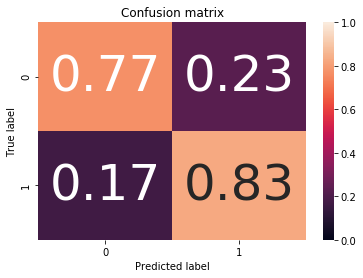

In [52]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(features_train, target_train)
# using this predict function we try to predict through our algo and compare in confusion matrix against the target test
prediction_test = rf.predict(X=features_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Train
print("Training Accuracy is: ", rf.score(features_train, target_train))
# Accuracy on Test
print("Testing Accuracy is: ", rf.score(features_test, target_test))

# Confusion Matrix
cm = confusion_matrix(target_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.857
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.846
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.835
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.857
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.824
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.813
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.868
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.857
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.846
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.846
Classification accuracy on test set with max features = log2 and max_depth = None: 0.813
Classification accuracy on test set with max features = log2

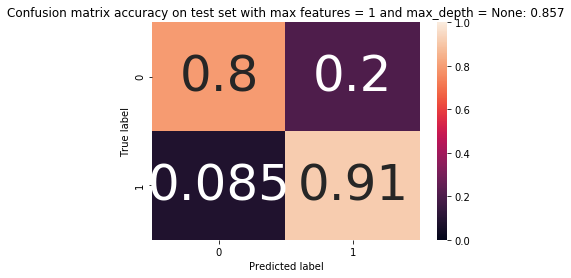

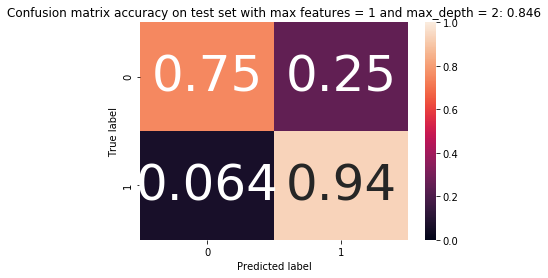

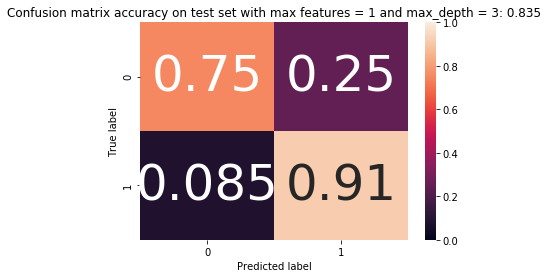

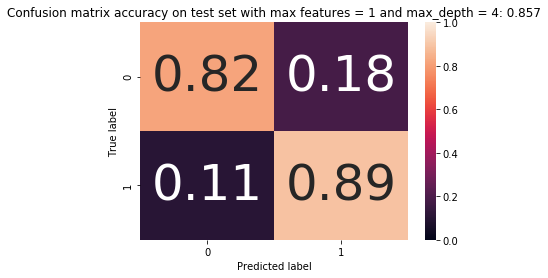

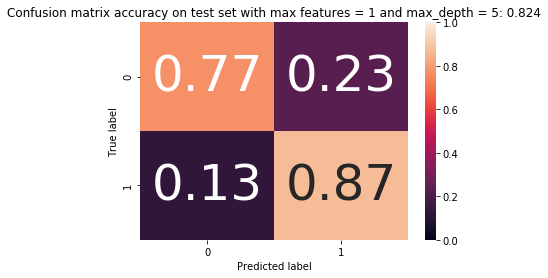

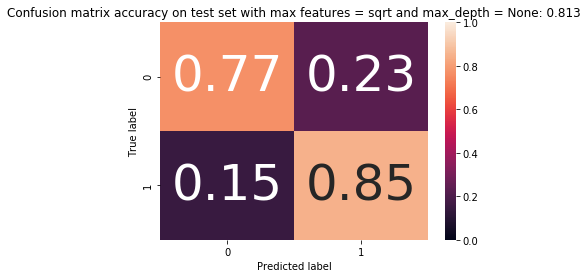

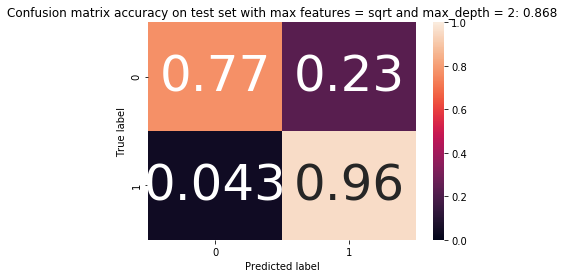

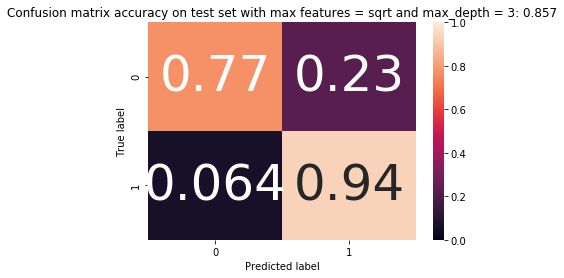

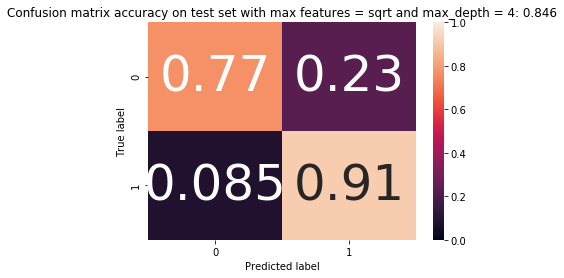

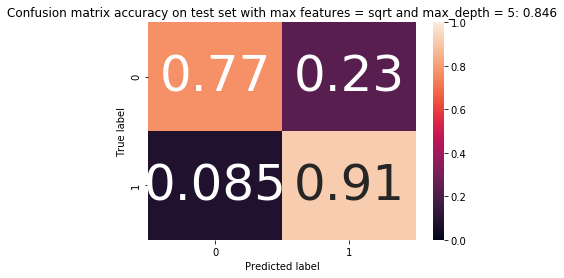

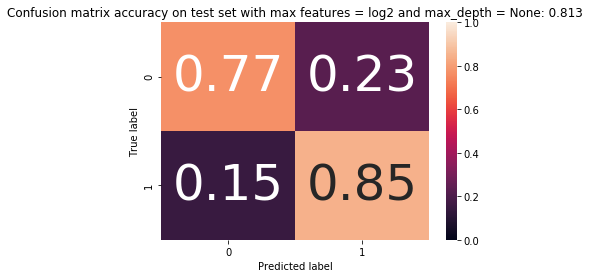

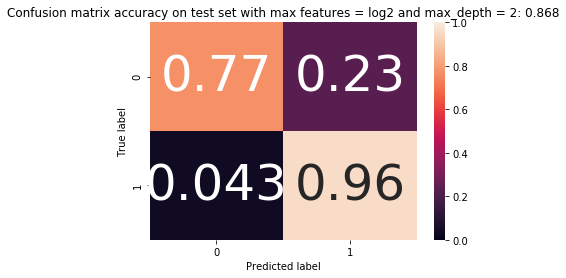

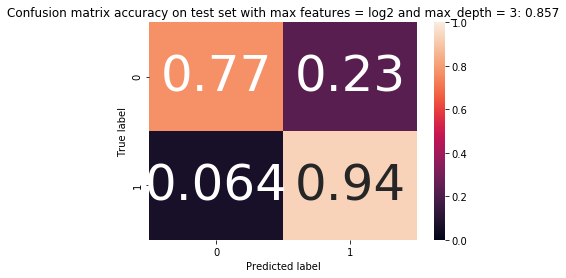

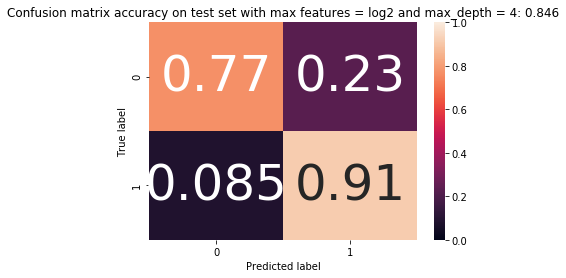

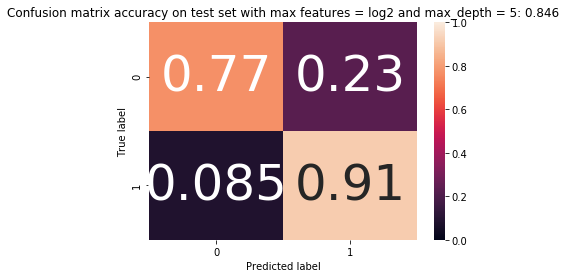

In [54]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(features_train, target_train)
    prediction_test = rf.predict(X=features_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(target_test,prediction_test)))
    cm = confusion_matrix(target_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(target_test,prediction_test)))

In [21]:
# We will run the Random Forest Classifier on GridSearch for best hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 'criterion':['entropy', 'gini']}
rfcgrid = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, verbose=100, cv=10, n_jobs=-2)
rfcgrid.fit(features_train, target_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50 
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50 
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50 
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(3,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(3,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(5,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pick

[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50, score=0.7727272727272727, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50, score=0.8181818181818182, total=   0.1s
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50, score=0.7272727272727273, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50 
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50 
[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Batch computation too fast (0.1606s.) Setting batch_size=2.
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (sh

[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50, score=0.7619047619047619, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50, score=0.9, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100, score=0.8181818181818182, total=   0.3s
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50, score=0.7142857142857143, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=50, score=0.85, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100 
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100 
[Parallel(n_jobs=-2)]: Done   8 tasks      | elapsed:    0.7

[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100, score=0.6666666666666666, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100, score=0.8636363636363636, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100, score=0.9, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=100 
[Parallel(n_jobs=-2)]: Done  16 tasks      | elapsed:    1.2s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(21

[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200, score=0.8095238095238095, total=   0.3s
[CV] bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200, score=0.7142857142857143, total=   0.3s
[CV] bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=50, score=0.8181818181818182, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=50 
[Parallel(n_jobs=-2)]: Done  26 tasks      | elapsed:    2.3s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling arra

[CV] bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=50, score=0.7142857142857143, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=50, score=0.9, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=50, score=0.85, total=   0.1s
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    3.0s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).


[CV]  bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.8095238095238095, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.6666666666666666, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.9, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=100 
[Parallel(n_jobs=-2)]: Done  46 tasks      | elapsed:    3.7s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(21

[CV]  bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.8636363636363636, total=   0.4s
[CV] bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.8095238095238095, total=   0.4s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=50, score=0.8181818181818182, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=50 
[Parallel(n_jobs=-2)]: Done  54 tasks      | elapsed:    4.7s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=

[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=50, score=0.8095238095238095, total=   0.1s
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=50, score=0.7142857142857143, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=50 
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=50 
[CV]  bootstrap=True, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.9, total=   0.4s
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=50, score=0.6666666666666666, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=50, score=0.95, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=100 
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=50 
[Parallel(n_jobs=-2)]: Done  64 tasks      | elapsed:    5.4s
Pickling array (shape=(13,

[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=100, score=0.8571428571428571, total=   0.2s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=100, score=0.8181818181818182, total=   0.2s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=100, score=0.9090909090909091, total=   0.2s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=100, score=0.8095238095238095, total=   0.2s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=200 
[Parallel(n_jobs=-2)]: Done  72 tasks      | elapsed:    6.0s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling 

[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=200, score=0.8571428571428571, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=200, score=0.7272727272727273, total=   0.4s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=200, score=0.7727272727272727, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=200 
[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    6.9s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,)

[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=200, score=0.7619047619047619, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=50, score=0.8571428571428571, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=50, score=0.7142857142857143, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=50, score=0.8095238095238095, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=50 
[Parallel(n_jobs=-2)]: Done  92 tasks      | elapsed:    7.6s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,)

[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=100, score=0.7272727272727273, total=   0.2s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=100, score=0.8571428571428571, total=   0.2s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=100, score=0.8181818181818182, total=   0.2s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=100, score=0.9090909090909091, total=   0.2s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=100, score=0.8095238095238095, total=   0.2s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt

[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=200, score=0.7272727272727273, total=   0.4s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=200, score=0.8571428571428571, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=200, score=0.7727272727272727, total=   0.4s
[CV] bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=200, score=0.8636363636363636, total=   0.4s
[Parallel(n_jobs=-2)]: Done 112 tasks      | elapsed:    9.2s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64)

[CV]  bootstrap=False, criterion=entropy, max_features=auto, n_estimators=50, score=0.8181818181818182, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=50 
[CV]  bootstrap=True, criterion=gini, max_features=sqrt, n_estimators=200, score=0.7619047619047619, total=   0.4s
[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_features=auto, n_estimators=50, score=0.7619047619047619, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_features=auto, n_estimators=50, score=0.6190476190476191, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=50 
[Parallel(n_jobs=-2)]: Done 120 tasks      | elapsed:    9.9s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dt

[CV]  bootstrap=False, criterion=entropy, max_features=auto, n_estimators=50, score=0.75, total=   0.1s
[CV]  bootstrap=False, criterion=entropy, max_features=auto, n_estimators=100, score=0.7272727272727273, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=100 
[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  bootstrap=False, criterion=entropy, max_features=auto, n_estimators=100, score=0.6818181818181818, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=100 
[Parallel(n_jobs=-2)]: Done 130 tasks      | elapsed:   10.4s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (sha

[CV]  bootstrap=False, criterion=entropy, max_features=auto, n_estimators=100, score=0.8095238095238095, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_features=auto, n_estimators=100, score=0.75, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=200 
[Parallel(n_jobs=-2)]: Done 138 tasks      | elapsed:   11.1s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(3,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pi

[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=200 
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=50, score=0.6363636363636364, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_features=auto, n_estimators=200, score=0.6666666666666666, total=   0.4s
[CV] bootstrap=False, criterion=entropy, max_features=auto, n_estimators=200 
[Parallel(n_jobs=-2)]: Done 146 tasks      | elapsed:   11.9s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickl

[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=50, score=0.8095238095238095, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=50, score=0.6190476190476191, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=50, score=0.85, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=50, score=0.7142857142857143, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=False, criterion=entropy, max_features=auto, n_estimators=200, score=0.75, total=   0.4s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100 
[Parallel(n_jobs=-2)]: Done 154 tasks      | elaps

[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.8095238095238095, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.7727272727272727, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.8636363636363636, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.8571428571428571, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=200 
[Parallel(n_jobs=-2)]: Done 162 tasks      | elapsed:   13.3s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (sha

[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.6818181818181818, total=   0.4s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.8095238095238095, total=   0.4s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.7727272727272727, total=   0.4s
[CV] bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=200 
[Parallel(n_jobs=-2)]: Done 172 tasks      | elapsed:   14.2s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pick

[CV]  bootstrap=False, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.8095238095238095, total=   0.4s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=50, score=0.8636363636363636, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=50, score=0.8095238095238095, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=50, score=0.6666666666666666, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=50 
[Parallel(n_jobs=-2)]: Done 180 tasks      | elapsed:   15.0s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickl

[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=50, score=0.8, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=100 
[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=100, score=0.7272727272727273, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=100 
[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=100, score=0.7272727272727273, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=100 
[Parallel(n_jobs=-2)]: Done 190 tasks      | elapsed:   15.5s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=in

[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=100 
[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=100, score=0.9, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=100 
[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=100, score=0.7142857142857143, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=100, score=0.8, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=200, score=0.7272727272727273, total=   0.3s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=200 
[Parallel(n_jobs=-2)]: Done 198 tasks      | elapsed:   16.1s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8)

[CV]  bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=50, score=0.7727272727272727, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=50, score=0.7272727272727273, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=50 
[CV]  bootstrap=False, criterion=gini, max_features=auto, n_estimators=200, score=0.85, total=   0.4s
[CV] bootstrap=False, criterion=gini, max_features=auto, n_estimators=200 
[Parallel(n_jobs=-2)]: Done 208 tasks      | elapsed:   17.1s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(4,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (shape=(212,), dtype=int8

[CV]  bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=50, score=0.8, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100, score=0.7272727272727273, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100, score=0.7272727272727273, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100, score=0.8095238095238095, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100 
[Parallel(n_jobs=-2)]: Done 220 tasks      | elapsed:   17.9s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8).
Pickling array (shape=(2,), dtype=int64).
Pickling array (s

[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100, score=0.9, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100 
[CV]  bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100, score=0.7142857142857143, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=100, score=0.8, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=200, score=0.7272727272727273, total=   0.3s
[CV] bootstrap=False, criterion=gini, max_features=sqrt, n_estimators=200 
[Parallel(n_jobs=-2)]: Done 228 tasks      | elapsed:   18.5s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int8)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [22]:
# Checking the best params
rfcgrid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 50}

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

rfcpredictions = rfcgrid.predict(features_test)

print("Confusion Matrix - Random Forest")
print(confusion_matrix(target_test,rfcpredictions))
print("\n")
print("Accuracy Score - Random Forest")
print(accuracy_score(target_test, rfcpredictions))
print("\n")
print("F1 Score - Random Forest")
print(f1_score(target_test, rfcpredictions))
print("\n")
print("Classification Report - Random Forest")
print(classification_report(target_test,rfcpredictions))

Confusion Matrix - Random Forest
[[34 10]
 [ 7 40]]


Accuracy Score - Random Forest
0.8131868131868132


F1 Score - Random Forest
0.8247422680412372


Classification Report - Random Forest
             precision    recall  f1-score   support

          0       0.83      0.77      0.80        44
          1       0.80      0.85      0.82        47

avg / total       0.81      0.81      0.81        91



In [24]:
from sklearn.svm import SVC

# We will define a list of param values in a grid and run SV classifier across various combinations

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}
svmgrid = GridSearchCV(SVC(), param_grid, verbose=100, cv=10, n_jobs=-2)
svmgrid.fit(features_train_scaled, target_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7727272727272727, total=   0.0s
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8181818181818182, total=   0.0s
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7272727272727273, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8636363636363636, total=   0.0s
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8095238095238095, total=   0.0s
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8095238095238095, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ............

[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.8636363636363636, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5454545454545454, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.6363636363636364, total=   0.0s
Pickling array (shape=(212, 13), dtype=float64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(191,), dtype=int64).
Pickling array (shape=(21,), dtype=int64).
Pickling array (shape=(191,), dtype=int64).
Pickling array (shape=(21,), dtype=int64).
Pickling array (shape=(192,), dtype=int64).
Pickling array (shape=(20,), dtype=int64).
Pickling array (shape=(192,), dtype=int64).
Pickling array (shape=(20,), dtype=int64).
Pickling array (shape=(190,), dtype=int64).
Pickling array (shape=(22,), dtype=int64).
Pickling array 

[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7619047619047619, total=   0.0s
[CV] ........ C=0.1, gamma=0.1, kernel=poly, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6363636363636364, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=poly, score=0.7, total=   0.0s
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7619047619047619, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.01, kernel=linear, score=0.7727272727272727, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.714285714

[CV]  C=0.1, gamma=0.01, kernel=poly, score=0.5714285714285714, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.1, kernel=poly, score=0.7727272727272727, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5909090909090909, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.1, kernel=poly, score=0.7619047619047619, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6818181818181818, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.1, kernel=poly, score=0.7619047619047619, total=   0.0s
[CV]  C=0.1, gamma=0.01, kernel=rb

[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, score=0.5454545454545454, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.5714285714285714, total=   0.0s
[CV]  C=0.1, gamma=0.0001, kernel=linear, score=0.8181818181818182, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.0001, kernel=linear, score=0.7272727272727273, total=   0.0s
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.5714285714285714, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, score=0.5454545454545454, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=0.1, gamma=0.0001, kernel=linear, score=0.8636363636363636, total=   0.0s
[CV] C

[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=0.1, gamma=0.0001, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.5454545454545454, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV]  C=0.1, gamma=0.0001, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV] ..... C=0.1, gamma=0.0001, kernel=poly, score=0.55, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV]  C=0.1, gamma=0.001, kernel=sigmoid, score=0.5714285714285714, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ..... C=0.1, gamma=0.0001, kernel=poly, score=0.55, total=   0.0s
[CV]  C=0.1, gamma=0.001, kernel=sigmoid, score=0.5714285714285714, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] C=0.1, gamma=0.0001, ker

[CV]  C=1, gamma=0.1, kernel=rbf, score=0.7619047619047619, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=1, kernel=poly, score=0.6363636363636364, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] C=1, gamma=1, kernel=poly .......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=1, kernel=poly, score=0.8181818181818182, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.7619047619047619, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=1, kernel=linear, score=0.95, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=poly, score=0.6363636363636364, total

[CV] ........... C=1, gamma=0.01, kernel=rbf, score=0.9, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.8181818181818182, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ........... C=1, gamma=0.01, kernel=rbf, score=0.9, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.8636363636363636, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.8095238095238095, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.01, kernel=sigmoid, score=0.7727272727272727, total=   0.0s
[CV]  C=1, gamma=0.1, kernel=linear, score=0.8095238095238095, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] C=1, gamma=0.01, kernel=poly ..........

[CV] ....... C=1, gamma=0.01, kernel=linear, score=0.95, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=sigmoid, score=0.8095238095238095, total=   0.0s
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8181818181818182, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.7272727272727273, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf ..............

[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.5454545454545454, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV]  C=1, gamma=0.001, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.5454545454545454, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=poly, score=0.5714285714285714, total=   0.0s
[CV]  C=1, gamma=0.001, kernel=poly, score=0.5714285714285714, total=   0.0s
[CV] C=1, gamma=0.001, kernel=pol

[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.5909090909090909, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.6363636363636364, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=linear, score=0.8095238095238095, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.6666666666666666, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
Pickling array (shape=(212, 13), dtype=float64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(190,), dtype=int64).
Pickling array (shape=(22,), dtype=int64).
Pickling array (shape=(190,), dtype=int64).
Pickling array (shape=(22,

[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.8095238095238095, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.8181818181818182, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.6363636363636364, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ....... C=10, gamma=0.1, kernel=linear, score=0.95, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.7272727272727273, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.7619047619047619, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ....... C=10, gamma=0.1, kernel=linear, score

[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV] ......... C=10, gamma=0.01, kernel=rbf, score=0.95, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.5714285714285714, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.7727272727272727, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.5714285714285714, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.5714285714285714, total=   0.0s
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.7727272727272727, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly .

[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.8095238095238095, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.7142857142857143, total=   0.0s
[CV]  C=10, gamma=0.001, kernel=linear, score=0.8095238095238095, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.8095238095238095, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ..... C=10, gamma=0.001, kernel=sigmoid, score=0.9, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] .... C=10, gamma=0.001, kernel=sigmoid, score=0.85, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.8095238095238095, total=   0.0s
[CV] C=10, gamma=0.001, kerne

[CV]  C=10, gamma=0.0001, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV] .... C=10, gamma=0.0001, kernel=linear, score=0.95, total=   0.0s
[CV]  C=10, gamma=0.0001, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV]  C=10, gamma=0.0001, kernel=poly, score=0.5714285714285714, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV] .... C=10, gamma=0.0001, kernel=linear, score=0.95, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=poly, score=0.5714285714285714, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV]  C=10, gamma=0.0001, kernel=poly,

[CV]  C=100, gamma=1, kernel=rbf, score=0.5454545454545454, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.5909090909090909, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6190476190476191, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6190476190476191, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.5714285714285714, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.5714285714285714, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ............ C=100, gamma=1, kernel=rbf, score=0.6, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ...........................

[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.8636363636363636, total=   0.3s
[CV] C=100, gamma=0.1, kernel=linear .................................
[Parallel(n_jobs=-2)]: Done 630 tasks      | elapsed:    4.8s
Pickling array (shape=(212, 13), dtype=float64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(191,), dtype=int64).
Pickling array (shape=(21,), dtype=int64).
Pickling array (shape=(191,), dtype=int64).
Pickling array (shape=(21,), dtype=int64).
Pickling array (shape=(192,), dtype=int64).
Pickling array (shape=(20,), dtype=int64).
Pickling array (shape=(192,), dtype=int64).
Pickling array (shape=(20,), dtype=int64).
Pickling array (shape=(190,), dtype=int64).
Pickling array (shape=(22,), dtype=int64).
Pickling array (shape=(190,), dtype=int64).
Pickling array (shape=(22,), dtype=int64).
Pickling array

[CV]  C=100, gamma=0.001, kernel=linear, score=0.7142857142857143, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.7142857142857143, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.8095238095238095, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[Parallel(n_jobs=-2)]: Done 678 tasks      | elapsed:    6.0s
Pickling array (shape=(212, 13), dtype=float64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(212,), dtype=int64).
Pickling array (shape=(191,), dtype=int64).
Pickling array (shape=(21,), dtype=int64).
Pickling array (shape=(191,), dtype=int64).
Pickling array (shape=(21,), dtype=int64).
Pickling array (shape=(191,), dtype=int64).
Pickling array (shape=(21,), dtype=int64).
Pickling array (shape=(191,), dtype=int64

[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.8095238095238095, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.7619047619047619, total=   0.0s
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.8095238095238095, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.7142857142857143, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.8095238095238095, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.8095238095238095, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ......... C=100, gamm

[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.5454545454545454, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.6818181818181818, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.6666666666666666, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=100, gamma=0.0001, kernel=linear, score=0.8181818181818182, total=   0.5s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.6666666666666666, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.6666666666666666, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, ker

[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7272727272727273, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8095238095238095, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ........ C=1000, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ........ C=1000, gamma=0.1, kernel=rbf, sc

[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.7619047619047619, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ........ C=1000, gamma=0.01, kernel=rbf, score=0.8, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ....... C=1000, gamma=0.01, kernel=rbf, score=0.85, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.7272727272727273, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.8636363636363636, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.7727272727272727, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigm

[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5454545454545454, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5909090909090909, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6190476190476191, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6190476190476191, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5714285714285714, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5714285714285714, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ........... C=1000, gamma=1, kernel=rbf, score=0

[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.7142857142857143, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.8095238095238095, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] .. C=1000, gamma=0.001, kernel=sigmoid, score=0.95, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] .. C=1000, gamma=0.001, kernel=sigmoid, score=0.95, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, score=0.5454545454545454, total=   0.0s
[CV] C=1000, gamma=0.001, 

[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.8095238095238095, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.8095238095238095, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ...... C=1000, gamma=0.0001, kernel=rbf, score=0.9, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ..... C=1000, gamma=0.0001, kernel=rbf, score=0.95, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.7727272727272727, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.8181818181818182, total=   0.0s
[CV] C=1000, gamma=0.000

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [26]:
# Check for best params
svmgrid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [27]:
svm_predictions = svmgrid.predict(features_test_scaled)

print("Confusion Matrix - Support Vector Machines")
print(confusion_matrix(target_test, svm_predictions))
print("\n")
print("Accuracy Score - Support Vector Machines")
print(accuracy_score(target_test, svm_predictions))
print("\n")
print("F1 Score - Support Vector Machines")
print(f1_score(target_test, svm_predictions))
print("\n")
print("Classification Report - Support Vector Machines")
print(classification_report(target_test, svm_predictions))

Confusion Matrix - Support Vector Machines
[[36  8]
 [ 3 44]]


Accuracy Score - Support Vector Machines
0.8791208791208791


F1 Score - Support Vector Machines
0.8888888888888888


Classification Report - Support Vector Machines
             precision    recall  f1-score   support

          0       0.92      0.82      0.87        44
          1       0.85      0.94      0.89        47

avg / total       0.88      0.88      0.88        91



In [28]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators':[100, 200, 300], 'loss' : ['deviance', 'exponential'], 'learning_rate':[0.001, 0.01, 0.1, 1, 10], 'criterion':['friedman_mse', 'mse', 'mae']}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, verbose=True, cv=10, n_jobs=-2)
grid.fit(features_train_scaled, target_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-2)]: Done 382 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-2)]: Done 757 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 900 out of 900 | elapsed:  1.7min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'n_estimators': [100, 200, 300], 'loss': ['deviance', 'exponential'], 'learning_rate': [0.001, 0.01, 0.1, 1, 10], 'criterion': ['friedman_mse', 'mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [29]:
# check the best params
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 100}

In [30]:
grid_predictions = grid.predict(features_test_scaled)

print("Confusion Matrix - Gradient Boosting")
print(confusion_matrix(target_test,grid_predictions))
print("\n")
print("Accuracy Score - Gradient Boosting")
print(accuracy_score(target_test, grid_predictions))
print("\n")
print("F1 Score - Gradient Boosting")
print(f1_score(target_test, grid_predictions))
print("\n")
print("Classification Report - Gradient Boosting")
print(classification_report(target_test, grid_predictions)) 

Confusion Matrix - Gradient Boosting
[[34 10]
 [ 6 41]]


Accuracy Score - Gradient Boosting
0.8241758241758241


F1 Score - Gradient Boosting
0.8367346938775511


Classification Report - Gradient Boosting
             precision    recall  f1-score   support

          0       0.85      0.77      0.81        44
          1       0.80      0.87      0.84        47

avg / total       0.83      0.82      0.82        91



In [ ]:
# Log Reg

lr = LogisticRegression()
# you fit on the training set containing features and also containing targer
model = lr.fit(features_train, target_train)
# then you
lr_predict = lr.predict(features_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

In [57]:
# Loading from CSV
unseen_data = pd.read_csv('/Users/zainali/Documents/DS-Projects/Heart Attack Analysis/data/unseen.csv')

In [58]:
unseen_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [63]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#features_train_scaled = sc.fit_transform(features_train)
features_test_scaled = sc.fit_transform(unseen_data)



In [76]:
rfcpredictions = rfcgrid.predict(unseen_data.values)

In [77]:
rfcpredictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
# unseen data is the same data on which it was trained so i am comparing with the target variable itself
print("Confusion Matrix - Random Forest")
print(confusion_matrix(target,rfcpredictions))
print("\n")
print("Accuracy Score - Random Forest")
print(accuracy_score(target, rfcpredictions))
print("\n")
print("F1 Score - Random Forest")
print(f1_score(target, rfcpredictions))
print("\n")
print("Classification Report - Random Forest")
print(classification_report(target, rfcpredictions)) 

Confusion Matrix - Random Forest
[[128  10]
 [  7 158]]


Accuracy Score - Random Forest
0.9438943894389439


F1 Score - Random Forest
0.9489489489489489


Classification Report - Random Forest
             precision    recall  f1-score   support

          0       0.95      0.93      0.94       138
          1       0.94      0.96      0.95       165

avg / total       0.94      0.94      0.94       303

